In [86]:
import spacy
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#need to first run python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

Simple test

In [77]:
doc = nlp("this is taylor's fucking fucked fuck displaying words lyrics")
for token in doc:
    print(token, token.lemma, token.lemma_)

this 1995909169258310477 this
is 10382539506755952630 be
taylor 15315501216784911612 taylor
's 16428057658620181782 's
fucking 12903434802346126505 fuck
fucked 12903434802346126505 fuck
fuck 12903434802346126505 fuck
displaying 7988947642011127135 display
words 11916616154811659322 word
lyrics 8880186832239517916 lyric


Import a song

In [78]:
lyric_file_list = glob.glob('lyric_files/*.txt')
downloaded_songs = pd.DataFrame([(file_name,file_name.split('/')[-1].split('.txt')[0].split('-')[0]
,'-'.join(file_name.split('/')[-1].split('.txt')[0].split('-')[1:])) for file_name in lyric_file_list]
,columns=['file_path','album_name','name'])
downloaded_songs.head(3)

,file_path,album_name,name
0,lyric_files/Fearless-Tell Me Why.txt,Fearless,Tell Me Why
1,lyric_files/folklore-hoax.txt,folklore,hoax
2,lyric_files/folklore-the 1.txt,folklore,the 1


In [79]:
def get_number_of_fucks(file_path):
    ''''''
    with open(file_path, 'r') as f:
        lyrics = f.read()
        lower_lyrics = lyrics.lower()
    doc = nlp(lower_lyrics)
    fuck_count = len([token.lemma_ for token in doc if 'fuck' in token.lemma_])
    return fuck_count

In [80]:
downloaded_songs['fuck_count'] = downloaded_songs['file_path'].apply(lambda x: get_number_of_fucks(x))

In [82]:
filtered_albums = pd.read_csv("taylor_swift_top_filtered_albums.csv").rename(columns={'name':'album_name'})
filtered_albums.head(3)

,album_group,album_type,artists,available_markets,external_urls,href,id,images,album_name,release_date,release_date_precision,total_tracks,type,uri,album_rank
0,album,album,[{'external_urls': {'spotify': 'https://open.s...,['JP'],{'spotify': 'https://open.spotify.com/album/3M...,https://api.spotify.com/v1/albums/3Mvk2LKxfhc2...,3Mvk2LKxfhc2KVSnDYC40I,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Fearless,2008-11-11,day,20,album,spotify:album:3Mvk2LKxfhc2KVSnDYC40I,1.0
1,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU...",{'spotify': 'https://open.spotify.com/album/5e...,https://api.spotify.com/v1/albums/5eyZZoQEFQWR...,5eyZZoQEFQWRHkV2xgAeBw,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Taylor Swift,2006-10-24,day,15,album,spotify:album:5eyZZoQEFQWRHkV2xgAeBw,1.0
2,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",{'spotify': 'https://open.spotify.com/album/15...,https://api.spotify.com/v1/albums/151w1FgRZfnK...,151w1FgRZfnKZA9FEcg9Z3,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Midnights,2022-10-21,day,13,album,spotify:album:151w1FgRZfnKZA9FEcg9Z3,1.0


In [83]:
albums_tracks_fucks = filtered_albums[['album_name','release_date']].merge(downloaded_songs, how='left', on=['album_name'])

In [84]:
albums_tracks_fucks['release_date'] = pd.to_datetime(albums_tracks_fucks['release_date'])

In [108]:
album_agg_fucks = albums_tracks_fucks.groupby(['album_name','release_date']).agg(num_fucks=('fuck_count','sum')).reset_index().sort_values('release_date')

In [110]:
album_agg_fucks['album_with_year'] = album_agg_fucks.apply(lambda x: x['album_name']+'-'+x['release_date'].strftime('%y'), axis=1)

In [111]:
album_agg_fucks

,album_name,release_date,num_fucks,album_with_year
6,Taylor Swift,2006-10-24,0,Taylor Swift-06
1,Fearless,2008-11-11,0,Fearless-08
5,Speak Now,2010-10-25,0,Speak Now-10
4,Red,2012-10-22,0,Red-12
0,1989,2014-10-27,0,1989-14
9,reputation,2017-11-10,0,reputation-17
2,Lover,2019-08-23,0,Lover-19
8,folklore,2020-07-24,3,folklore-20
7,evermore,2020-12-11,2,evermore-20
3,Midnights,2022-10-21,4,Midnights-22


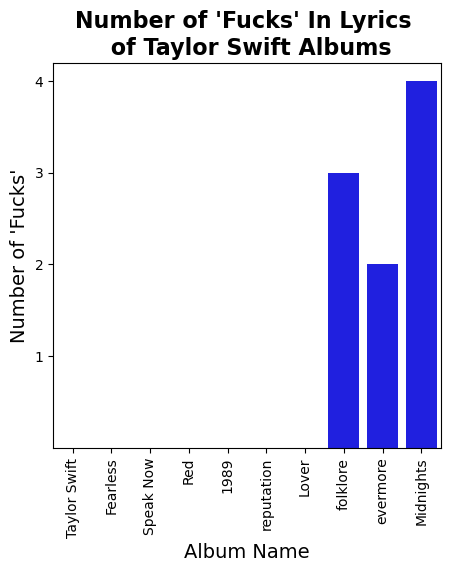

In [114]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=album_agg_fucks, x='album_name', y='num_fucks', ax=ax, color='blue')
ax.set_title("Number of 'Fucks' In Lyrics \n of Taylor Swift Albums", fontsize=16, fontweight='bold')
ax.set_xlabel("Album Name", fontsize=14)
ax.set_ylabel("Number of 'Fucks'", fontsize=14)
plt.yticks([1,2,3,4])
_ = plt.xticks(rotation = 90)

In [92]:
downloaded_songs.sort_values('fuck_count', ascending=False).query("fuck_count > 0")

,file_path,album_name,name,fuck_count
5,lyric_files/Midnights-Maroon.txt,Midnights,Maroon,2
125,lyric_files/Midnights-Question...?.txt,Midnights,Question...?,2
22,lyric_files/folklore-betty.txt,folklore,betty,2
136,lyric_files/folklore-mad woman.txt,folklore,mad woman,1
75,lyric_files/evermore-cowboy like me.txt,evermore,cowboy like me,1
134,lyric_files/evermore-champagne problems.txt,evermore,champagne problems,1
